# Demo for LumiSpy package working with Gatan SEM CL data

This notebook shows:

- Loading a `.dm4/.dm3` file correctly with the LumiSpy load function
- Plotting cathodoluminescence data in different ways
- Correcting for spectral artefacts

**Note for M&M 2022**: This notebook was copied from a the LumiSpy demo repostitory and only minor changes were made to ensure it runs with the current Hyperspy-bundle installation. The original copy can be found at https://github.com/LumiSpy/lumispy-demos

- Joshua Taillon, July 25, 2022

Import packages:

In [1]:
%matplotlib notebook
# Use '%matplotlib widget' in JupterLab and '%matplotlib notebook' in JupyterNotebook for interactive inline functionality (e.g. on binder)
#For pop-up window plots on your local computer, use '%matplotlib tk' or '%matplotlib qt' instead
import lumispy as lum
import hyperspy.api as hs

## Loading .dm4/dm3 files

Use the HyperSpy `load` function to load Gatan cathodoluminescence spectrum or spectrum image files.
State the relative path to the `Test-spectrum_ZnO-NWs.dm4` file.

In [2]:
# Single spectrum
cl_spec = hs.load('demo-files/load_from_GatanFiles/Test-spectrum_ZnO-NWs.dm4')

The `signal_type` is automatically recognized as `CL` and the data is saved as a `CLSpectrum` object.

In [3]:
cl_spec

<CLSpectrum, title: NW008-1_9k_spec1, dimensions: (|1336)>

If you prefer to use the `CLSEMSpectrum` subclass, you can change the signal_type:

In [4]:
cl_spec.set_signal_type('CL_SEM')

In [5]:
cl_spec

<CLSEMSpectrum, title: NW008-1_9k_spec1, dimensions: (|1336)>

<IPython.core.display.Javascript object>


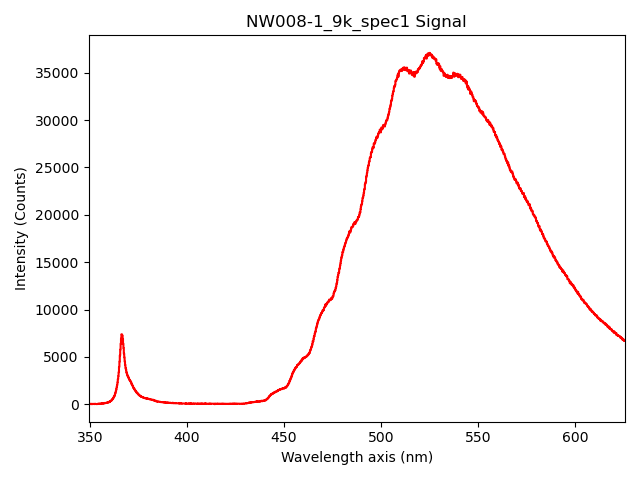

In [6]:
cl_spec.plot()

#### Convert from wavelength to energy axis

Required versions: hyperspy>=1.7.0 and lumispy>=0.2

In [7]:
cl_spec.to_eV(inplace=True) # replaces the original signal

<IPython.core.display.Javascript object>


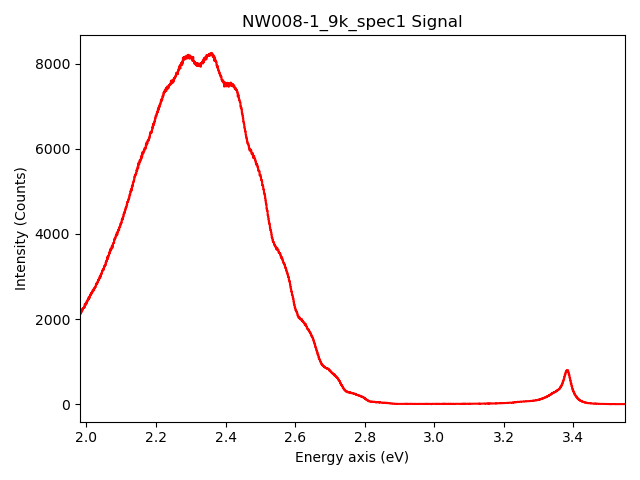

In [8]:
cl_spec.plot()

### Loading a spectral image

Loads a linescan (navigation dimension = 1 and signal dimension = 1)

In [9]:
cl_linescan = hs.load('demo-files/load_from_GatanFiles/Test-linescan_InGaAs-NWs.dm4')

Plot the data, to change the position of the displayed spectrum, drag the line on the navigator or use `left` and `right` arrow keys:

<IPython.core.display.Javascript object>


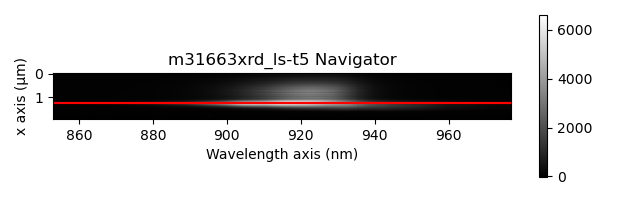

<IPython.core.display.Javascript object>


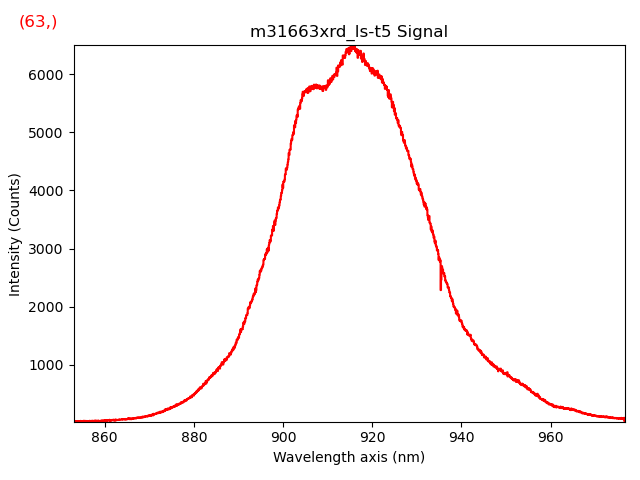

In [10]:
cl_linescan.plot()

## Correction of spectral defects

Let's start by removing a simple offset as the signal background:
1. Select a region to be used to determine the background: On the signal plot click, drag and release
2. You can still move the region or it's boundaries with the mouse and inspect the different spectra using the navigator to make sure the region is right
3. Press `Apply`

<IPython.core.display.Javascript object>


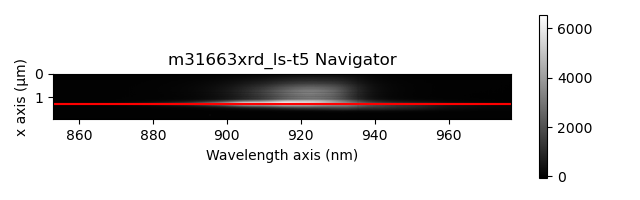

<IPython.core.display.Javascript object>


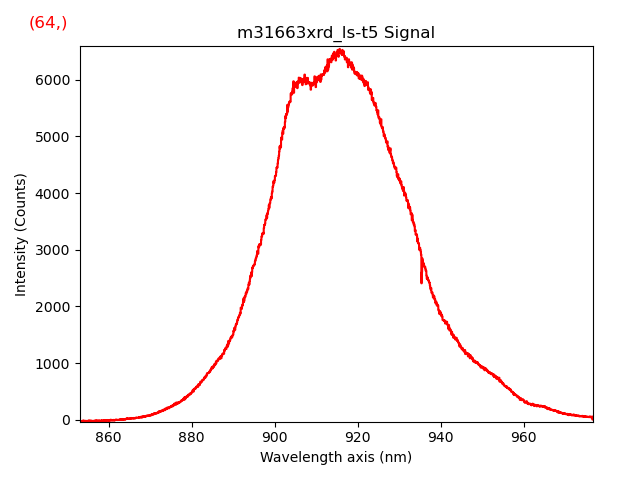

/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [11]:
cl_linescan.plot()
cl_linescan.remove_background(background_type="Offset")

There is also a tool for interactive removal of cosmic rays (pixels with sharp spikes), see `Help` for instructions:

- TODO: choose data file which includes several spikes

<IPython.core.display.Javascript object>


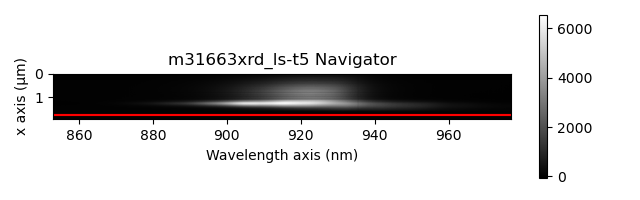

<IPython.core.display.Javascript object>


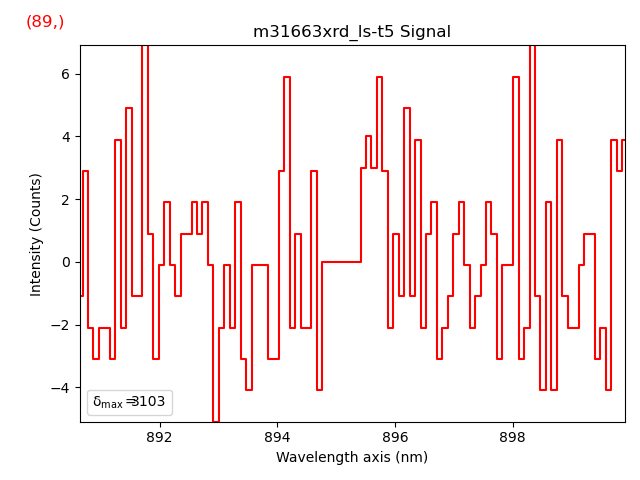

<IPython.core.display.Javascript object>


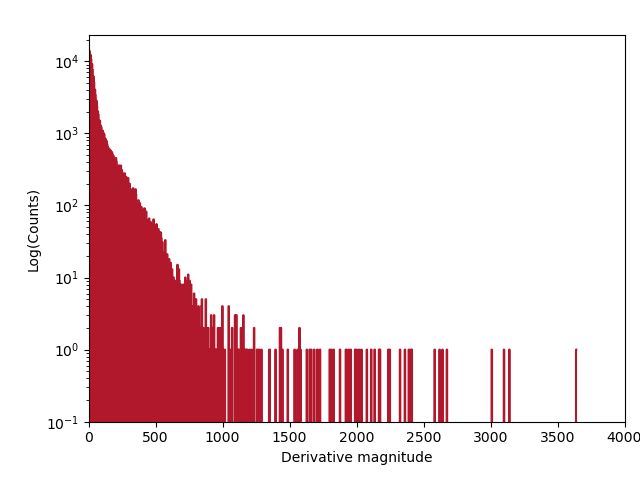

In [12]:
cl_linescan.plot()
cl_linescan.spikes_removal_tool()

## Working with the metadata

All the microscope & some spectrometer parameters are saved in the metadata (note that currently the Gatan microscope parameters are saved under `TEM` even if acquired with an SEM).

Metadata can be accessed via (you can expand/close the nodes by clicking on them):

In [13]:
cl_spec.metadata

├── Acquisition_instrument
│   ├── Detector
│   │   ├── binning = (1, 100)
│   │   ├── detector_type = CCD
│   │   ├── exposure_per_frame = 1.0
│   │   ├── frames = 5
│   │   ├── integration_time = 5.0
│   │   ├── pixel_size = 20.0
│   │   ├── processing = Dark Subtracted
│   │   ├── saturation_fraction = 0.11530579626560211
│   │   └── sensor_roi = (0, 0, 100, 1336)
│   ├── SEM
│   │   ├── Stage
│   │   │   ├── tilt_alpha = 0.0
│   │   │   ├── tilt_beta = 164.99998474121094
│   │   │   ├── x = 71.00000232458115
│   │   │   ├── y = 54.00000140070915
│   │   │   └── z = 0.4999999073334038
│   │   ├── acquisition_mode = SEM
│   │   ├── beam_current = 0.0
│   │   ├── beam_energy = 5.0
│   │   ├── camera_length = 0.0
│   │   ├── magnification = 10075.4912109375
│   │   └── microscope = Ultra55
│   └── Spectrometer
│       ├── Grating
│       │   └── groove_density = 300.0
│       ├── acquisition_mode = Parallel dispersive
│       └── central_wavelength = 479.9828796386719
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2022-07-25T12:35:25.586311-06:00
│   ├── date = 2019-06-26
│   ├── original_filename = Test-spectrum_ZnO-NWs.dm4
│   ├── time = 16:17:55
│   └── title = NW008-1_9k_spec1
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── format = Spectrum
    ├── quantity = Intensity (Counts)
    └── signal_type = CL_SEM

The original metadata from the `.dm4` file is available at `original_metadata`:

In [14]:
cl_spec.original_metadata

├── ApplicationBounds = (0, 0, 1065, 1596)
├── DocumentObjectList
│   └── TagGroup0
│       ├── AnnotationGroupList
│       ├── AnnotationType = 20
│       ├── BackgroundColor = (-1, -1, -1)
│       ├── BackgroundMode = 2
│       ├── FillMode = 2
│       ├── ForegroundColor = (-1, 0, 0)
│       ├── HasBackground = 0
│       ├── ImageDisplayInfo
│       │   ├── BackgroundColor = (-5655, -5655, -5655)
│       │   ├── BackgroundOn = 1
│       │   ├── CalibrationSliceId
│       │   │   └── Data0 = 0
│       │   ├── CaptionAttributes = 7
│       │   ├── CaptionColor = (0, 0, 0)
│       │   ├── CaptionFaceName = Lucida Sans Unicode
│       │   ├── CaptionOn = 1
│       │   ├── CaptionSize = 10
│       │   ├── CursorOn = 0
│       │   ├── CursorPosition = 0.0
│       │   ├── DimensionLabels
│       │   │   └── Data0 = []
│       │   ├── DynamicContrast = 1
│       │   ├── FrameOn = 1
│       │   ├── GridColor = (0, -1, -1)
│       │   ├── GridOn = 1
│       │   ├── GroupId = 0
│       │   ├── GroupList
│       │   │   └── TagGroup0
│       │   │       ├── DoAutoSurveyHigh = 1
│       │   │       ├── DoAutoSurveyLow = 1
│       │   │       ├── GroupToDisplay
│       │   │       │   ├── Offset = (-0.0, -0.0)
│       │   │       │   └── Scale = (0.0007485030218958855, 2.499999391147867e-05)
│       │   │       ├── TrackStyleX = 0
│       │   │       └── TrackStyleY = 0
│       │   ├── LegendOn = 0
│       │   ├── MainSliceId
│       │   │   └── Data0 = 0
│       │   ├── NumHorizontalTicks = 1
│       │   ├── NumVerticalTicks = 1
│       │   ├── SliceList
│       │   │   └── TagGroup0
│       │   │       ├── BaseIntensity = 0.0
│       │   │       ├── ComplexMode = 4
│       │   │       ├── DrawFill = 1
│       │   │       ├── DrawLine = 0
│       │   │       ├── DrawTransparent = 0
│       │   │       ├── FillColor = (23644, -16449, -16449)
│       │   │       ├── Horz Pos Fixed = 1
│       │   │       ├── Horz Scale Fixed = 1
│       │   │       ├── ImageToGroup
│       │   │       │   ├── Offset = (0.0, 0.0)
│       │   │       │   └── Scale = (1.0, 1.0)
│       │   │       ├── IsVisible = 1
│       │   │       ├── LineColor = (0, -32640, -16449)
│       │   │       ├── LineStyle = 0
│       │   │       ├── LineThickness = 1
│       │   │       ├── SliceGroup = 0
│       │   │       ├── SliceId
│       │   │       │   └── Data0 = 0
│       │   │       ├── Transparency = 0.0
│       │   │       ├── TransparencyStyle = 0
│       │   │       ├── Vert Pos Fixed = 1
│       │   │       └── Vert Scale Fixed = 1
│       │   └── SurveyRegion = 1
│       ├── ImageDisplayType = 3
│       ├── ImageSource = 0
│       ├── IsMoveable = 1
│       ├── IsResizable = 1
│       ├── IsSelectable = 1
│       ├── IsTranslatable = 1
│       ├── IsVisible = 1
│       ├── ObjectTags
│       ├── Rectangle = (0.0, 0.0, 342.0, 669.0)
│       └── UniqueID = 8
├── DocumentTags
├── HasWindowPosition = 1
├── ImageList
│   └── TagGroup0
│       ├── ImageData
│       │   ├── Calibrations
│       │   │   ├── Brightness
│       │   │   │   ├── Origin = 0.0
│       │   │   │   ├── Scale = 1.0
│       │   │   │   └── Units = Counts
│       │   │   ├── Dimension
│       │   │   │   └── TagGroup0
│       │   │   │       ├── Origin = -1686.4329833984375
│       │   │   │       ├── Scale = 0.20711833238601685
│       │   │   │       └── Units = nm
│       │   │   └── DisplayCalibratedUnits = 1
│       │   ├── Data
│       │   │   ├── endian = little
│       │   │   ├── offset = 308046
│       │   │   ├── size = 1336
│       │   │   └── size_bytes = 5344
│       │   ├── DataType = 2
│       │   ├── Dimensions
│       │   │   └── Data0 = 1336
│       │   └── PixelDepth = 4
│       ├── ImageTags
│       │   ├── Acquisition
│       │   │   ├── Device
│       │   │   │   ├── Active Size (pixels) = (1340, 100)
│       │   │   │   ├── CCD
│       │   │   │   │   └── Pixel Size (um) = (20.0, 20.0)
│       │   │   │   ├── Camera Number = 0
│       │   │   │   ├── Configuration
│      

You can add or change parameters manually using:

In [15]:
cl_spec.metadata.set_item('General.title', 'demo spectrum')
cl_spec.metadata.set_item('General.comment', 'I love using LumiSpy')

In [16]:
cl_spec.metadata

├── Acquisition_instrument
│   ├── Detector
│   │   ├── binning = (1, 100)
│   │   ├── detector_type = CCD
│   │   ├── exposure_per_frame = 1.0
│   │   ├── frames = 5
│   │   ├── integration_time = 5.0
│   │   ├── pixel_size = 20.0
│   │   ├── processing = Dark Subtracted
│   │   ├── saturation_fraction = 0.11530579626560211
│   │   └── sensor_roi = (0, 0, 100, 1336)
│   ├── SEM
│   │   ├── Stage
│   │   │   ├── tilt_alpha = 0.0
│   │   │   ├── tilt_beta = 164.99998474121094
│   │   │   ├── x = 71.00000232458115
│   │   │   ├── y = 54.00000140070915
│   │   │   └── z = 0.4999999073334038
│   │   ├── acquisition_mode = SEM
│   │   ├── beam_current = 0.0
│   │   ├── beam_energy = 5.0
│   │   ├── camera_length = 0.0
│   │   ├── magnification = 10075.4912109375
│   │   └── microscope = Ultra55
│   └── Spectrometer
│       ├── Grating
│       │   └── groove_density = 300.0
│       ├── acquisition_mode = Parallel dispersive
│       └── central_wavelength = 479.9828796386719
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2022-07-25T12:35:25.586311-06:00
│   ├── comment = I love using LumiSpy
│   ├── date = 2019-06-26
│   ├── original_filename = Test-spectrum_ZnO-NWs.dm4
│   ├── time = 16:17:55
│   └── title = demo spectrum
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── format = Spectrum
    ├── quantity = Intensity (Counts)
    └── signal_type = CL_SEM

## Saving the manipulated data to the HyperSpy format

HyperSpy can not save to `.dm4` files, but supports writing files to the `hdf5` format:

In [17]:
# cl_spec.save('cl_test_spectrum.hspy')